In [1]:
import pyautogui
import pandas as pd
df = pd.DataFrame(columns=['num', 'top', 'left', 'width', 'height'])
img_path = './imgs/'

ll = 0
for i in range(1, 9+1):
    positions = pyautogui.locateAllOnScreen(f'{img_path}{i}.png', confidence=0.90)
    for pos in positions:
        new_row = {'num':i, 'top':pos.top, 'left':pos.left, 
                   'width':pos.width, 'height':pos.height}
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        ll += 1

In [2]:
df

,num,top,left,width,height
0,1,236,206,14,16
1,1,236,207,14,16
2,1,269,173,14,16
3,1,269,174,14,16
4,1,269,305,14,16
...,...,...,...,...,...
308,9,465,438,13,19
309,9,465,569,13,19
310,9,465,570,13,19
311,9,498,503,13,19


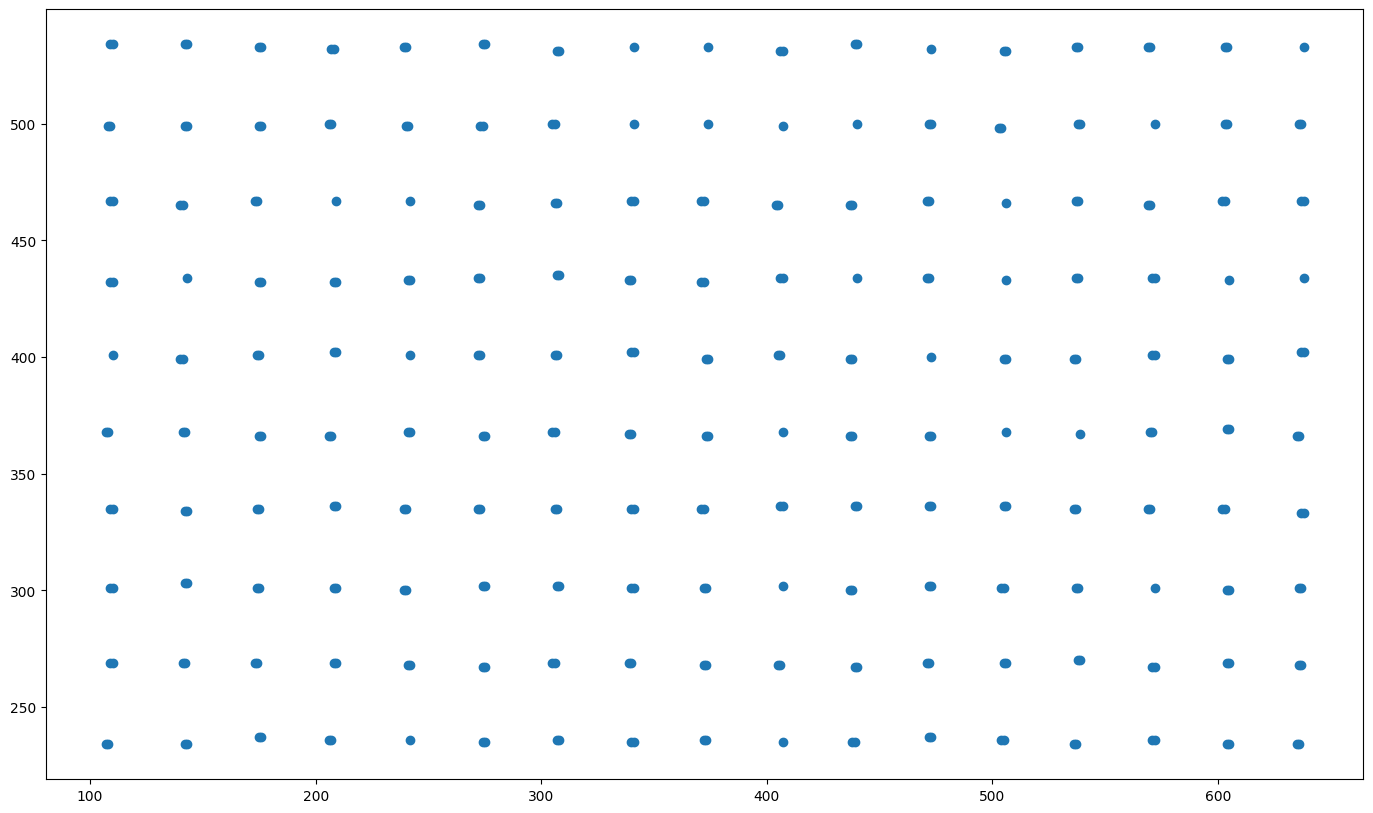

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot()
ax.scatter(df['left'], df['top'])


In [4]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
os.environ["OMP_NUM_THREADS"] = "2"

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=170)
kmeans.fit(df[['top', 'left']])
df['cluster'] = kmeans.labels_
df = df.groupby(by='cluster').mean()

In [6]:
kmeans = KMeans(n_clusters=17)
kmeans.fit(df[['left']])
df['x_cls'] = kmeans.labels_

kmeans = KMeans(n_clusters=10)
kmeans.fit(df[['top']])
df['y_cls'] = kmeans.labels_

c:\Users\zerot\anaconda3\envs\practice\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\zerot\anaconda3\envs\practice\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
for xi in range(17):
    mean_value = df.loc[df['x_cls'] == xi, 'left'].mean()  # 먼저 평균값 계산
    df.loc[df['x_cls'] == xi, 'left'] = mean_value  # loc를 사용하여 값 업데이트
for xi in range(10):
    mean_value = df.loc[df['y_cls'] == xi, 'top'].mean()  # 먼저 평균값 계산
    df.loc[df['y_cls'] == xi, 'top'] = mean_value  # loc를 사용하여 값 업데이트

In [17]:
df

,num,top,left,width,height,x_cls,y_cls,x
0,9.0,235.294118,109.05,13.0,19.0,12,7,109.05
1,3.0,235.294118,141.95,10.0,18.0,4,7,141.95
2,2.0,235.294118,174.8,11.0,15.0,10,7,174.80
3,1.0,235.294118,207.85,14.0,16.0,13,7,207.85
4,5.0,235.294118,240.95,11.0,16.0,0,7,240.95
...,...,...,...,...,...,...,...,...
165,3.0,532.764706,505.25,10.0,18.0,1,5,505.25
166,7.0,532.764706,537.55,12.0,16.0,9,5,537.55
167,1.0,532.764706,570.9,14.0,16.0,6,5,570.90
168,7.0,532.764706,603.95,12.0,16.0,8,5,603.95


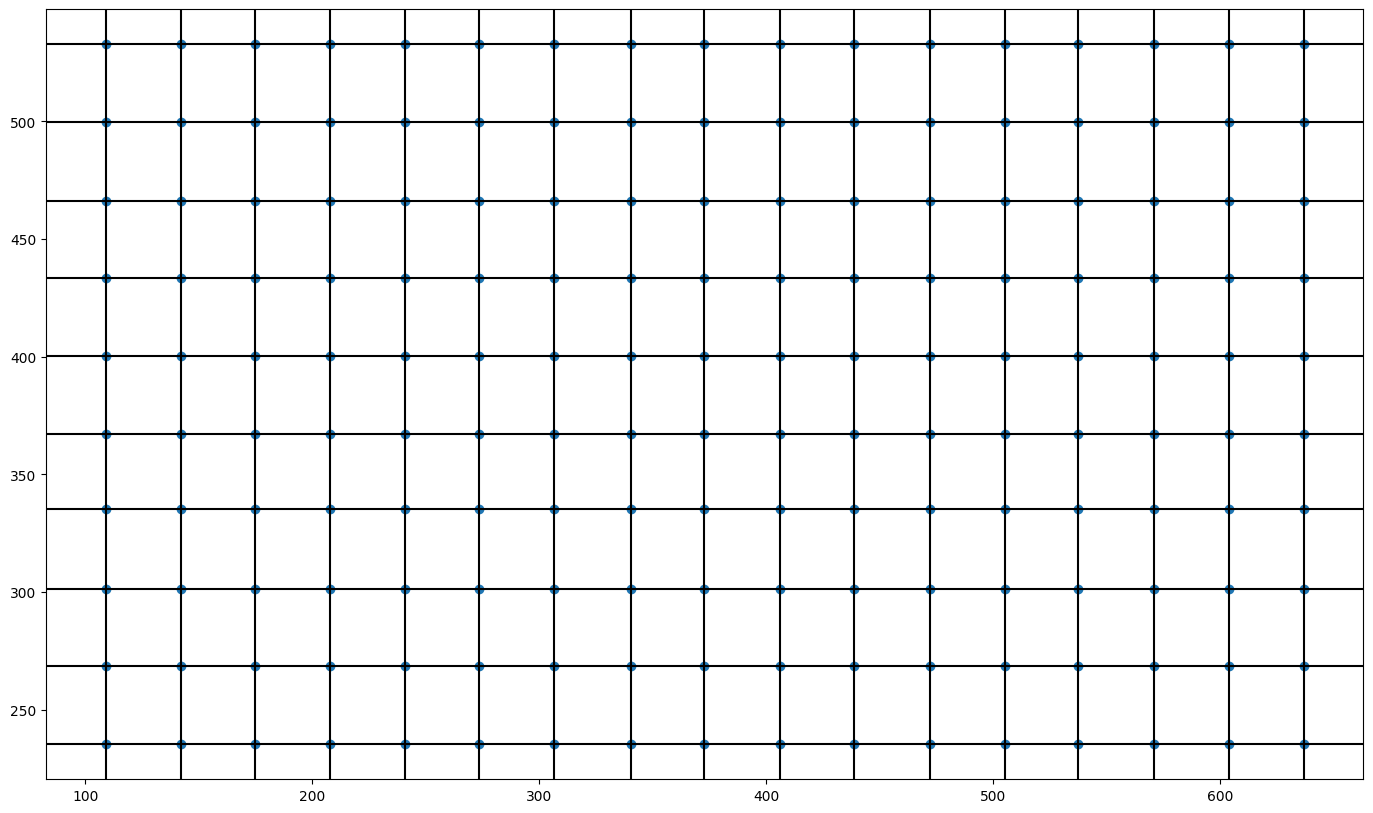

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot()
ax.scatter(df['left'], df['top'])
xloc = df['left'].unique()
for x in xloc:
    ax.axvline(x=x, color='black')
yloc = df['top'].unique()
for y in yloc:
    ax.axhline(y=y, color='black')

In [24]:
import numpy as np
df = df.sort_values(by=['top', 'left']).reset_index(drop=True)
num1d = np.array(df['num'].values.tolist(), dtype=int)
num2d = num1d.reshape(10, 17)

In [25]:
num2d

array([[9, 3, 2, 1, 5, 8, 4, 8, 7, 8, 6, 2, 7, 9, 4, 3, 9],
       [4, 7, 1, 4, 8, 3, 1, 7, 6, 6, 3, 7, 4, 2, 3, 4, 6],
       [8, 2, 6, 8, 9, 4, 4, 8, 6, 5, 9, 4, 6, 6, 8, 3, 6],
       [4, 8, 7, 2, 1, 1, 7, 4, 1, 2, 2, 2, 2, 1, 1, 1, 3],
       [1, 7, 3, 9, 4, 3, 1, 6, 3, 5, 9, 3, 5, 8, 7, 2, 9],
       [5, 9, 7, 2, 5, 1, 7, 2, 3, 7, 9, 8, 3, 9, 4, 3, 2],
       [3, 5, 3, 3, 8, 1, 2, 6, 9, 4, 5, 7, 8, 7, 4, 8, 5],
       [4, 9, 1, 5, 5, 9, 6, 4, 1, 9, 9, 7, 8, 7, 9, 1, 4],
       [6, 8, 8, 1, 6, 6, 1, 5, 5, 8, 5, 4, 9, 4, 5, 7, 7],
       [2, 2, 4, 6, 1, 2, 3, 5, 5, 3, 2, 8, 3, 7, 1, 7, 5]])